#**Intial Preparation of Data and Data Cleaning**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Workshop.csv')

In [4]:
print(df.head())

   Unnamed: 0      id            starttime                  day  \
0           0  650154  2021-11-01 01:10:00  2021-11-01 00:00:00   
1           1  650172  2021-11-01 01:10:00  2021-11-01 00:00:00   
2           2  650157  2021-11-01 01:10:00  2021-11-01 00:00:00   
3           3  637337  2021-10-28 07:20:00  2021-10-28 00:00:00   
4           4  637314  2021-10-28 07:20:00  2021-10-28 00:00:00   

               ecgi  cuid  plr_cuid  duid  plr_cellid  \
0  2708756710728705     3         0     0           3   
1  2708756710728450     0         2     2           0   
2  2708756710728450     2         2     0           0   
3  2708756710728193     0         1     1           0   
4  2708756710728193     1         1     0           0   

   min5_average_pdcp_sdu_delay_dl  min5_average_pdcp_sdu_drop_rate_dl  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0  

In [5]:
df['ecgi'].value_counts()

2708756710728707    14839
2708756710728705    13009
2708756710728450    10266
2708756710728706    10243
2708756710728449     9554
2708756710728451     9060
2708756710728194     8958
2708756710728193     7555
2708756710728195     7452
Name: ecgi, dtype: int64

In [6]:
# dataframe without (w/o) of meta data
df_wo_meta=df[['starttime','ecgi','min5_average_pdcp_sdu_delay_dl', 'min5_average_pdcp_sdu_drop_rate_dl', 'min5_pdcp_packets_lost_rate_dl', 'min5_pdcp_packets_lost_rate_ul', 'min5_volte_downlink_packet_loss_rate', 'min5_volte_uplink_packet_loss_rate']]

In [7]:
df_wo_meta.head()

,starttime,ecgi,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
0,2021-11-01 01:10:00,2708756710728705,0.0,0.0,0.0,0.0,0,0
1,2021-11-01 01:10:00,2708756710728450,0.0,0.0,0.0,0.0,0,0
2,2021-11-01 01:10:00,2708756710728450,0.0,0.0,0.0,0.0,0,0
3,2021-10-28 07:20:00,2708756710728193,0.0,0.0,0.0,0.0,0,0
4,2021-10-28 07:20:00,2708756710728193,0.0,0.0,0.0,0.0,0,0


In [8]:
# ECGI is the name of a cell, therefore it should be considered a category not a number
# starttime should be considered in date/time format

df_wo_meta['ecgi']=df_wo_meta['ecgi'].astype('category')

df_wo_meta['starttime']=pd.to_datetime(df_wo_meta['starttime'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now, we should expect the statistics of the data set to be meaningful

In [9]:
df_wo_meta.describe()

,min5_average_pdcp_sdu_delay_dl,min5_average_pdcp_sdu_drop_rate_dl,min5_pdcp_packets_lost_rate_dl,min5_pdcp_packets_lost_rate_ul,min5_volte_downlink_packet_loss_rate,min5_volte_uplink_packet_loss_rate
count,90936.000000,90936.000000,90936.000000,90936.000000,90936.0,90936.0
mean,9.256201,0.000083,0.003104,0.013235,0.0,0.0
std,38.850754,0.005572,0.019666,0.080573,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,3019.965600,0.981846,0.925234,0.999681,0.0,0.0


In [12]:
df_wo_meta.isnull().sum()

starttime                               0
ecgi                                    0
min5_average_pdcp_sdu_delay_dl          0
min5_average_pdcp_sdu_drop_rate_dl      0
min5_pdcp_packets_lost_rate_dl          0
min5_pdcp_packets_lost_rate_ul          0
min5_volte_downlink_packet_loss_rate    0
min5_volte_uplink_packet_loss_rate      0
dtype: int64

#** PLOT EXTRACTED Investigation of Min5 Average PDCP SDU Delay DL**

In [13]:
global_PDCP_SDU_Delay_DL=df_wo_meta[['starttime', 'min5_average_pdcp_sdu_delay_dl']]

In [14]:
global_PDCP_SDU_Delay_DL.head(10)

,starttime,min5_average_pdcp_sdu_delay_dl
0,2021-11-01 01:10:00,0.000000
1,2021-11-01 01:10:00,0.000000
2,2021-11-01 01:10:00,0.000000
3,2021-10-28 07:20:00,0.000000
4,2021-10-28 07:20:00,0.000000
5,2021-11-01 01:20:00,0.000000
6,2021-11-01 01:20:00,0.000000
7,2021-11-01 01:05:00,0.000000
8,2021-10-24 05:45:00,39.107143
9,2021-11-01 00:55:00,12.000000


In [15]:
global_PDCP_SDU_Delay_DL['min5_average_pdcp_sdu_delay_dl'].value_counts()

0.000000      69224
12.000000       164
29.500000        34
11.000000        29
19.000000        20
              ...  
19.075321         1
26.483060         1
68.323200         1
33.951670         1
835.248700        1
Name: min5_average_pdcp_sdu_delay_dl, Length: 12293, dtype: int64

There are 69224 values of 0 which is why we can barely see anything else, let's remove it to more accurately see the other values of the distribution

In [16]:
global_PDCP_SDU_Delay_DL_wo_zeros=global_PDCP_SDU_Delay_DL[global_PDCP_SDU_Delay_DL.min5_average_pdcp_sdu_delay_dl != 0]

In [17]:
values = global_PDCP_SDU_Delay_DL_wo_zeros['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).keys().tolist()
counts = global_PDCP_SDU_Delay_DL_wo_zeros['min5_average_pdcp_sdu_delay_dl'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

In [18]:
value_dict

{12.0: 164,
 29.5: 34,
 11.0: 29,
 19.0: 20,
 16.0: 11,
 14.0: 10,
 22.0: 8,
 41.5: 8,
 13.0: 7,
 20.6: 6,
 17.0: 6,
 17.333334: 6,
 23.666666: 6,
 22.666666: 6,
 32.0: 6,
 26.333334: 5,
 44.5: 5,
 50.0: 5,
 29.0: 5,
 17.833334: 5,
 71.5: 4,
 23.0: 4,
 40.25: 4,
 52.5: 4,
 13.691615: 4,
 16.666666: 4,
 19.818182: 4,
 19.75: 4,
 23.714285: 4,
 27.0: 4,
 60.0: 4,
 33.5: 4,
 25.0: 4,
 16.545835: 4,
 30.5: 4,
 14.5: 4,
 30.899258: 4,
 17.084106: 4,
 20.75: 4,
 21.0: 4,
 24.5: 4,
 32.276596: 3,
 42.0: 3,
 37.5: 3,
 54.0: 3,
 46.0: 3,
 20.0: 3,
 17.666666: 3,
 36.0: 3,
 23.136364: 3,
 28.555555: 3,
 15.5: 3,
 20.5: 3,
 40.0: 3,
 31.666666: 3,
 31.0: 3,
 28.0: 3,
 18.0: 3,
 21.75: 3,
 44.25: 3,
 37.367317: 2,
 14.535551: 2,
 59.583645: 2,
 14.705941: 2,
 14.300175: 2,
 64.298: 2,
 87.058426: 2,
 16.504305: 2,
 79.84607: 2,
 66.548454: 2,
 22.854753: 2,
 81.74524: 2,
 15.119506: 2,
 15.462295: 2,
 44.10126: 2,
 31.1423: 2,
 14.264757: 2,
 37.989685: 2,
 21.25592: 2,
 14.91711: 2,
 28.312307: 2

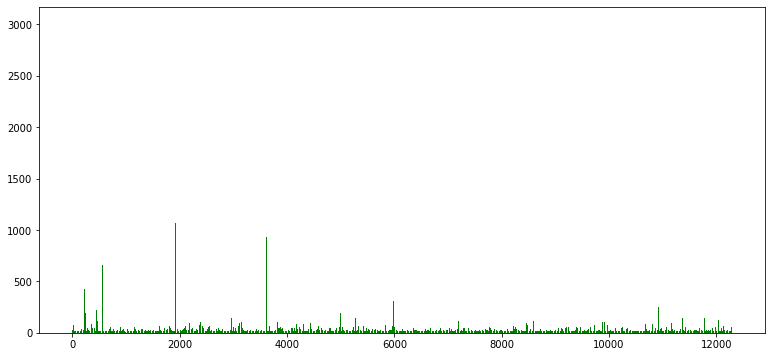

In [25]:
fig = plt.figure(figsize=(13,6))
y_pos = np.arange(len(value_dict.values()))
fig=plt.bar(y_pos, list(value_dict.keys()), color='g')
plt.show()

In [26]:
global_PDCP_SDU_Delay_DL_wo_zeros.describe()

,min5_average_pdcp_sdu_delay_dl
count,21712.000000
mean,38.767590
std,71.956922
min,8.000000
25%,17.523021
50%,23.119187
75%,36.632016
max,3019.965600


#** PLOT EXTRACTED Investigation of min5_average_pdcp_sdu_drop_rate_dl**

In [27]:
min5_average_pdcp_sdu_drop_rate_dl=df_wo_meta[['starttime', 'min5_average_pdcp_sdu_drop_rate_dl']]

In [28]:
min5_average_pdcp_sdu_drop_rate_dl.head(10)

,starttime,min5_average_pdcp_sdu_drop_rate_dl
0,2021-11-01 01:10:00,0.0
1,2021-11-01 01:10:00,0.0
2,2021-11-01 01:10:00,0.0
3,2021-10-28 07:20:00,0.0
4,2021-10-28 07:20:00,0.0
5,2021-11-01 01:20:00,0.0
6,2021-11-01 01:20:00,0.0
7,2021-11-01 01:05:00,0.0
8,2021-10-24 05:45:00,0.0
9,2021-11-01 00:55:00,0.0


In [29]:
min5_average_pdcp_sdu_drop_rate_dl['min5_average_pdcp_sdu_drop_rate_dl'].value_counts()

0.000000    90069
0.000015        2
0.000051        2
0.001753        2
0.000091        2
            ...  
0.011350        1
0.003578        1
0.030091        1
0.013267        1
0.029156        1
Name: min5_average_pdcp_sdu_drop_rate_dl, Length: 492, dtype: int64

There are 90069 values of 0 which is why we can barely see anything else, let's remove it to more accurately see the other values of the distribution

In [31]:
min5_average_pdcp_sdu_drop_rate_dl_wo_zeroes=min5_average_pdcp_sdu_drop_rate_dl[min5_average_pdcp_sdu_drop_rate_dl.min5_average_pdcp_sdu_drop_rate_dl != 0]

In [32]:
values = min5_average_pdcp_sdu_drop_rate_dl_wo_zeroes['min5_average_pdcp_sdu_drop_rate_dl'].value_counts(dropna=False).keys().tolist()
counts = min5_average_pdcp_sdu_drop_rate_dl_wo_zeroes['min5_average_pdcp_sdu_drop_rate_dl'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

In [33]:
value_dict

{0.0001842245: 2,
 0.6099575: 2,
 0.00028898986: 2,
 0.00048087147: 2,
 0.0075641493: 2,
 0.008152749: 2,
 0.00023832856: 2,
 0.005781132: 2,
 0.00011879399: 2,
 3.7741688e-06: 2,
 0.008114379: 2,
 6.923057e-05: 2,
 0.001245564: 2,
 3.8112816e-05: 2,
 0.00062127813: 2,
 0.01302468: 2,
 0.0009614399: 2,
 0.0068854108: 2,
 0.001971735: 2,
 8.0061254e-05: 2,
 0.0011259234: 2,
 0.00041995762: 2,
 0.005131974: 2,
 0.0060356315: 2,
 0.00031035973: 2,
 0.015293558: 2,
 0.015389019: 2,
 0.00033345073: 2,
 0.00023786773: 2,
 0.013745785: 2,
 0.035667136: 2,
 6.4988235e-06: 2,
 0.0003881695: 2,
 0.0009922163: 2,
 0.011931691: 2,
 0.004322781: 2,
 0.10497238: 2,
 0.00014238979: 2,
 0.0049688704: 2,
 0.00015458991: 2,
 0.000739978: 2,
 0.008177954: 2,
 0.004065862: 2,
 0.00040516414: 2,
 0.0014585165: 2,
 2.2461738e-05: 2,
 0.00056414574: 2,
 0.00015917265: 2,
 6.7338326e-05: 2,
 0.0019289564: 2,
 0.0033147403: 2,
 0.00019442276: 2,
 0.0006842971: 2,
 0.0002987618: 2,
 0.0012558041: 2,
 0.00897995

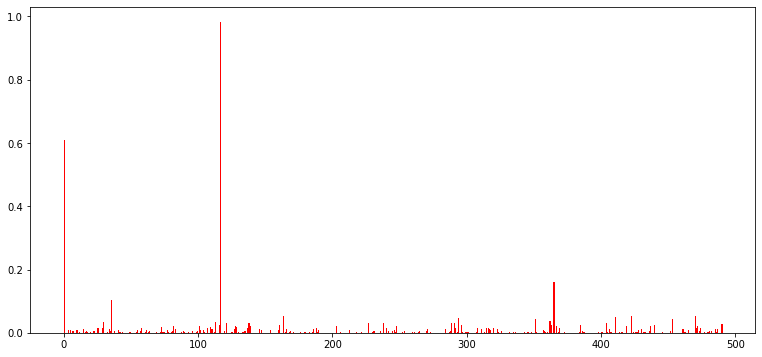

In [38]:
fig = plt.figure(figsize=(13,6))
y_pos = np.arange(len(value_dict.values()))
fig=plt.bar(y_pos, list(value_dict.keys()), color='r')
plt.show()

In [36]:
min5_average_pdcp_sdu_drop_rate_dl_wo_zeroes.describe()

,min5_average_pdcp_sdu_drop_rate_dl
count,867.000000
mean,0.008664
std,0.056440
min,0.000001
25%,0.000180
50%,0.000633
75%,0.004539
max,0.981846


#**entirely 0 min5_volte_downlink_packet_loss_rate**

In [39]:
min5_volte_downlink_packet_loss_rate=df_wo_meta[['starttime', 'min5_volte_downlink_packet_loss_rate']]

In [40]:
min5_volte_downlink_packet_loss_rate.head(10)

,starttime,min5_volte_downlink_packet_loss_rate
0,2021-11-01 01:10:00,0
1,2021-11-01 01:10:00,0
2,2021-11-01 01:10:00,0
3,2021-10-28 07:20:00,0
4,2021-10-28 07:20:00,0
5,2021-11-01 01:20:00,0
6,2021-11-01 01:20:00,0
7,2021-11-01 01:05:00,0
8,2021-10-24 05:45:00,0
9,2021-11-01 00:55:00,0


In [41]:
min5_volte_downlink_packet_loss_rate['min5_volte_downlink_packet_loss_rate'].value_counts()

0    90936
Name: min5_volte_downlink_packet_loss_rate, dtype: int64

There are 90069 values of 0 which is why we can barely see anything else, let's remove it to more accurately see the other values of the distribution

In [ ]:
min5_volte_downlink_packet_loss_rate_wo_zeroes=min5_volte_downlink_packet_loss_rate[min5_volte_downlink_packet_loss_rate.min5_volte_downlink_packet_loss_rate != 0]

In [ ]:
values = min5_average_pdcp_sdu_drop_rate_dl_wo_zeroes['min5_average_pdcp_sdu_drop_rate_dl'].value_counts(dropna=False).keys().tolist()
counts = min5_average_pdcp_sdu_drop_rate_dl_wo_zeroes['min5_average_pdcp_sdu_drop_rate_dl'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

In [ ]:
value_dict

{0.0001842245: 2,
 0.6099575: 2,
 0.00028898986: 2,
 0.00048087147: 2,
 0.0075641493: 2,
 0.008152749: 2,
 0.00023832856: 2,
 0.005781132: 2,
 0.00011879399: 2,
 3.7741688e-06: 2,
 0.008114379: 2,
 6.923057e-05: 2,
 0.001245564: 2,
 3.8112816e-05: 2,
 0.00062127813: 2,
 0.01302468: 2,
 0.0009614399: 2,
 0.0068854108: 2,
 0.001971735: 2,
 8.0061254e-05: 2,
 0.0011259234: 2,
 0.00041995762: 2,
 0.005131974: 2,
 0.0060356315: 2,
 0.00031035973: 2,
 0.015293558: 2,
 0.015389019: 2,
 0.00033345073: 2,
 0.00023786773: 2,
 0.013745785: 2,
 0.035667136: 2,
 6.4988235e-06: 2,
 0.0003881695: 2,
 0.0009922163: 2,
 0.011931691: 2,
 0.004322781: 2,
 0.10497238: 2,
 0.00014238979: 2,
 0.0049688704: 2,
 0.00015458991: 2,
 0.000739978: 2,
 0.008177954: 2,
 0.004065862: 2,
 0.00040516414: 2,
 0.0014585165: 2,
 2.2461738e-05: 2,
 0.00056414574: 2,
 0.00015917265: 2,
 6.7338326e-05: 2,
 0.0019289564: 2,
 0.0033147403: 2,
 0.00019442276: 2,
 0.0006842971: 2,
 0.0002987618: 2,
 0.0012558041: 2,
 0.00897995

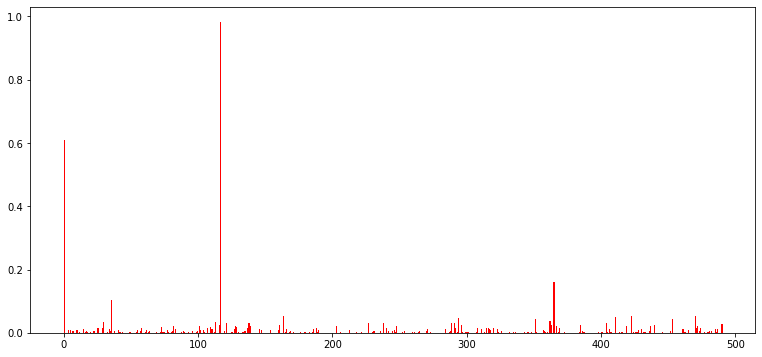

In [ ]:
fig = plt.figure(figsize=(13,6))
y_pos = np.arange(len(value_dict.values()))
fig=plt.bar(y_pos, list(value_dict.keys()), color='r')
plt.show()

In [ ]:
min5_average_pdcp_sdu_drop_rate_dl_wo_zeroes.describe()

,min5_average_pdcp_sdu_drop_rate_dl
count,867.000000
mean,0.008664
std,0.056440
min,0.000001
25%,0.000180
50%,0.000633
75%,0.004539
max,0.981846


#**Investigation of min5_pdcp_packets_lost_rate_ul**

In [46]:
min5_pdcp_packets_lost_rate_ul=df_wo_meta[['starttime', 'min5_pdcp_packets_lost_rate_ul']]

In [47]:
min5_pdcp_packets_lost_rate_ul.head(10)

,starttime,min5_pdcp_packets_lost_rate_ul
0,2021-11-01 01:10:00,0.000000
1,2021-11-01 01:10:00,0.000000
2,2021-11-01 01:10:00,0.000000
3,2021-10-28 07:20:00,0.000000
4,2021-10-28 07:20:00,0.000000
5,2021-11-01 01:20:00,0.000000
6,2021-11-01 01:20:00,0.000000
7,2021-11-01 01:05:00,0.000000
8,2021-10-24 05:45:00,0.002637
9,2021-11-01 00:55:00,0.000000


In [48]:
min5_pdcp_packets_lost_rate_ul['min5_pdcp_packets_lost_rate_ul'].value_counts()

0.000000    78230
0.079308        4
0.072367        4
0.099010        3
0.074713        3
            ...  
0.027005        1
0.009276        1
0.057526        1
0.017392        1
0.031116        1
Name: min5_pdcp_packets_lost_rate_ul, Length: 7343, dtype: int64

There are 78230 values of 0 which is why we can barely see anything else, let's remove it to more accurately see the other values of the distribution

In [49]:
min5_pdcp_packets_lost_rate_ul_wo_zeroes=min5_pdcp_packets_lost_rate_ul[min5_pdcp_packets_lost_rate_ul.min5_pdcp_packets_lost_rate_ul != 0]

In [50]:
values = min5_pdcp_packets_lost_rate_ul_wo_zeroes['min5_pdcp_packets_lost_rate_ul'].value_counts(dropna=False).keys().tolist()
counts = min5_pdcp_packets_lost_rate_ul_wo_zeroes['min5_pdcp_packets_lost_rate_ul'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

In [51]:
value_dict

{0.07930768: 4,
 0.07236716: 4,
 0.07471264: 3,
 0.0990099: 3,
 0.012239511: 2,
 0.9015539: 2,
 0.9342793: 2,
 0.5150443: 2,
 0.0016388341: 2,
 0.0023554722: 2,
 0.00042434662: 2,
 0.867055: 2,
 0.9518072: 2,
 0.10282206: 2,
 0.007553912: 2,
 0.0064129634: 2,
 0.051976807: 2,
 0.027885498: 2,
 0.04122114: 2,
 0.03459775: 2,
 0.7919162: 2,
 0.062142927: 2,
 0.039388303: 2,
 0.025147885: 2,
 0.07019009: 2,
 0.04985875: 2,
 0.032237116: 2,
 0.1279692: 2,
 0.10515473: 2,
 0.0014167299: 2,
 0.024497708: 2,
 0.016913442: 2,
 0.0017672731: 2,
 0.030159073: 2,
 0.025446137: 2,
 0.0039718533: 2,
 8.653064e-05: 2,
 0.2865446: 2,
 0.28141162: 2,
 0.715681: 2,
 0.12556142: 2,
 0.00014403487: 2,
 0.9793578: 2,
 0.19602789: 2,
 0.07534086: 2,
 0.07699678: 2,
 0.11008519: 2,
 0.07598528: 2,
 0.040154047: 2,
 0.01812877: 2,
 0.008702528: 2,
 0.054197155: 2,
 0.041618504: 2,
 0.032392: 2,
 0.009831057: 2,
 0.004085228: 2,
 0.38710445: 2,
 0.48460922: 2,
 0.030485276: 2,
 0.546999: 2,
 0.29991478: 2,
 0

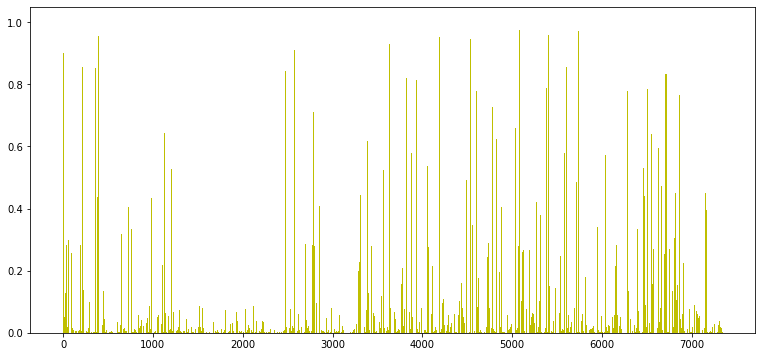

In [53]:
fig = plt.figure(figsize=(13,6))
y_pos = np.arange(len(value_dict.values()))
fig=plt.bar(y_pos, list(value_dict.keys()), color='y')
plt.show()

In [54]:
min5_pdcp_packets_lost_rate_ul_wo_zeroes.describe()

,min5_pdcp_packets_lost_rate_ul
count,1.270600e+04
mean,9.472165e-02
std,1.968417e-01
min,1.542902e-07
25%,2.391416e-03
50%,1.383424e-02
75%,6.700188e-02
max,9.996810e-01


#**Investigation of min5_average_pdcp_sdu_drop_rate_dl**

In [55]:
min5_pdcp_packets_lost_rate_dl=df_wo_meta[['starttime', 'min5_pdcp_packets_lost_rate_dl']]

In [56]:
min5_pdcp_packets_lost_rate_dl.head(10)

,starttime,min5_pdcp_packets_lost_rate_dl
0,2021-11-01 01:10:00,0.000000
1,2021-11-01 01:10:00,0.000000
2,2021-11-01 01:10:00,0.000000
3,2021-10-28 07:20:00,0.000000
4,2021-10-28 07:20:00,0.000000
5,2021-11-01 01:20:00,0.000000
6,2021-11-01 01:20:00,0.000000
7,2021-11-01 01:05:00,0.000000
8,2021-10-24 05:45:00,0.034483
9,2021-11-01 00:55:00,0.000000


In [57]:
min5_pdcp_packets_lost_rate_dl['min5_pdcp_packets_lost_rate_dl'].value_counts()

0.000000    70487
0.333333       13
0.142857       12
0.062500       10
0.500000        8
            ...  
0.074241        1
0.000359        1
0.001430        1
0.004563        1
0.008950        1
Name: min5_pdcp_packets_lost_rate_dl, Length: 11648, dtype: int64

There are 70487 values of 0 which is why we can barely see anything else, let's remove it to more accurately see the other values of the distribution

In [58]:
min5_pdcp_packets_lost_rate_dl_wo_zeroes=min5_pdcp_packets_lost_rate_dl[min5_pdcp_packets_lost_rate_dl.min5_pdcp_packets_lost_rate_dl != 0]

In [59]:
values = min5_pdcp_packets_lost_rate_dl_wo_zeroes['min5_pdcp_packets_lost_rate_dl'].value_counts(dropna=False).keys().tolist()
counts = min5_pdcp_packets_lost_rate_dl_wo_zeroes['min5_pdcp_packets_lost_rate_dl'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

In [60]:
value_dict

{0.33333334: 13,
 0.14285715: 12,
 0.0625: 10,
 0.5: 8,
 0.22222222: 7,
 0.01369863: 7,
 0.04347826: 7,
 0.16666667: 6,
 0.05882353: 6,
 0.0044444446: 6,
 0.009478673: 6,
 0.09090909: 6,
 0.015151516: 6,
 0.1764706: 6,
 0.0125: 6,
 0.06896552: 6,
 0.019607844: 5,
 0.1: 5,
 0.012048192: 5,
 0.13333334: 5,
 0.125: 5,
 0.07272727: 5,
 0.02631579: 5,
 0.083333336: 5,
 0.2: 5,
 0.027777778: 5,
 0.029411765: 4,
 0.006289308: 4,
 0.024691358: 4,
 0.057471264: 4,
 0.010238908: 4,
 0.002219756: 4,
 0.009328358: 4,
 0.011235955: 4,
 0.0032467532: 4,
 0.005263158: 4,
 0.0070921984: 4,
 0.05479452: 4,
 0.009259259: 4,
 0.04761905: 4,
 0.014705882: 4,
 0.038709678: 4,
 0.07692308: 4,
 0.030973451: 4,
 0.03846154: 4,
 0.03448276: 4,
 0.0011508805: 4,
 0.005524862: 4,
 0.006849315: 4,
 0.0036630037: 4,
 0.037037037: 4,
 0.009109731: 4,
 0.003236246: 4,
 0.00508647: 4,
 0.0042390404: 4,
 0.0026525198: 4,
 0.024390243: 4,
 0.022727273: 4,
 0.004608295: 4,
 0.020408163: 4,
 0.01923077: 4,
 0.0084951455:

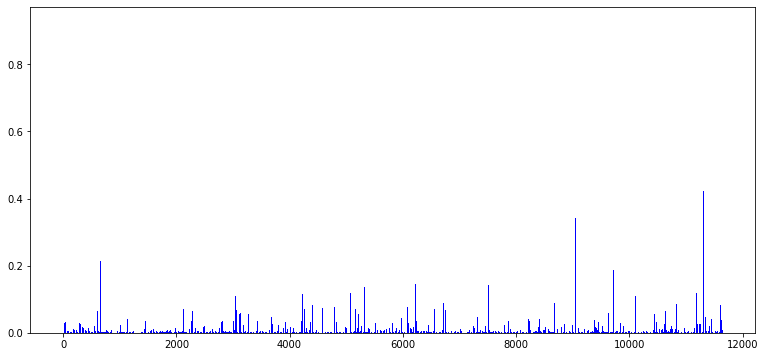

In [61]:
fig = plt.figure(figsize=(13,6))
y_pos = np.arange(len(value_dict.values()))
fig=plt.bar(y_pos, list(value_dict.keys()), color='b')
plt.show()

In [62]:
min5_pdcp_packets_lost_rate_dl_wo_zeroes.describe()

,min5_pdcp_packets_lost_rate_dl
count,20449.000000
mean,0.013804
std,0.039650
min,0.000002
25%,0.001230
50%,0.003240
75%,0.010175
max,0.925234
